In [23]:
import matplotlib.pyplot as plt
from asq.initiators import query
import json

workload_name = []
workload_score = []
project_name = 'workspace'

with open("qpi.json") as result:
    final = json.load(result)

def extract_results(node_name, section_name):
    qpi = query(final['nodes']).where(lambda child: child['name'] == node_name) \
            .select_many(lambda child: child['sections']) \
            .where(lambda child: child['name'] == section_name) \
            .select_many(lambda child: child['metrics']).to_list()

    for wl in qpi[0]['workloads']:
        workload_name.append(wl['name'])
        workload_score.append(wl['score'])

    x_axis = range(len(workload_name))

    plt.bar(x_axis, workload_score)
    plt.xticks(x_axis, workload_name)
    plt.xlabel('Workloads')
    plt.ylabel('Score')
    plt.title('Metric Result')
    return plt

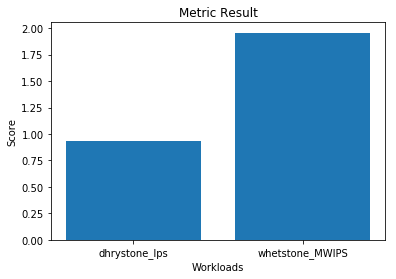

In [24]:
arithmetic = extract_results('node-9', 'arithmetic')
arithmetic.show()

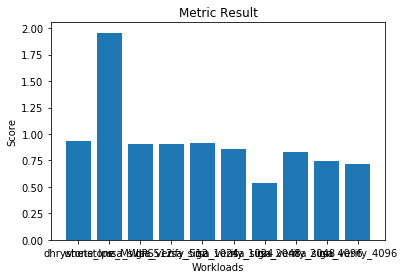

In [25]:
ssl = extract_results('node-9', 'SSL')
ssl.show()

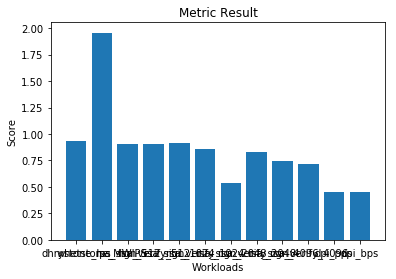

In [26]:
dpi = extract_results('node-9', 'DPI')
dpi.show()

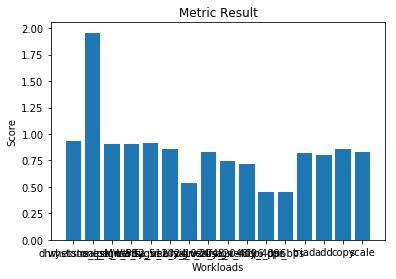

In [27]:
memory = extract_results('node-9', 'memory')
memory.show()